## 示例2：手写识别系统（P28）

In [1]:
def img2vector(file_name):
    data = np.zeros((1, 1024))
    with open(file_name, 'r') as f:
        for i in range(32):
            line = f.readline()
            for j in range(32):
                data[0, i * 32 + j] = int(line[j])
    return data

In [2]:
from os import listdir
import os


def read_data_from_dir(dir_name):
    train_file_list = listdir(dir_name)

    m = len(train_file_list)

    X = np.empty((m, 1024), dtype=np.int32)
    y = []

    i = 0
    for train_file_name in train_file_list:
        full_filename = os.path.join(dir_name, train_file_name)
        label = train_file_name.split("_")[0]
        img_vector = img2vector(full_filename)

        X[i, :] = np.array(img_vector)
        y.append(label)
        i += 1
    return X, y

In [3]:
train_dir_name = "./datas/digits/trainingDigits/"

X_train, y_train = read_data_from_dir(train_dir_name)
print(X_train.shape, len(y_train))

test_dir_name = "./datas/digits/testDigits/"
X_test, y_test = read_data_from_dir(test_dir_name)

(1934, 1024) 1934


790


/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


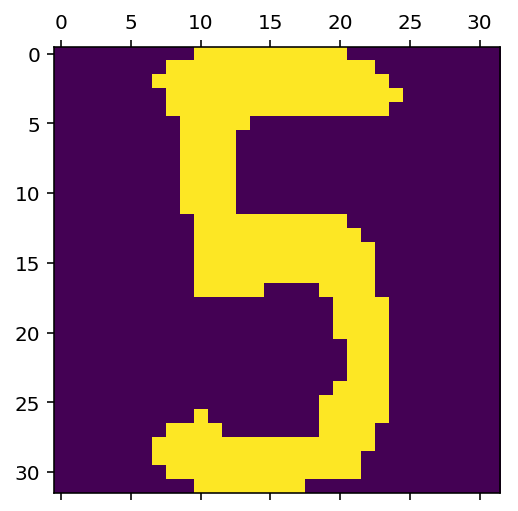

In [4]:
print(sum(X_train[0] == X_train[100]))
plt.matshow(X_train[0].reshape((32, 32)))

In [5]:
from my_knn_clf.KNNClassifier import KNNClassifier

knn_clf = KNNClassifier(k=3)
knn_clf.fit(X_train, y_train)

y_predict = knn_clf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score

print('使用自己编写的 kNN 分类器：', accuracy_score(y_test, y_predict))

使用自己编写的 kNN 分类器： 0.9883720930232558


In [7]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score

print('使用 scikit-learn 的 kNN 分类器：', accuracy_score(y_test, y_predict))

使用 scikit-learn 的 kNN 分类器： 0.9894291754756871
